# Credit Risk Classification Using Machine Learning  
**CIND 820 – Capstone Project**  
Strahinja Nakic | Toronto Metropolitan University | 500809487

## Project Overview

This project uses the German Credit dataset to classify loan applicants as good or bad credit risks.
The analysis applies three supervised machine learning models: Logistic Regression, Decision Tree, and Naive Bayes.
These models are trained and evaluated using performance metrics such as accuracy, recall, confusion matrix, and cross-validation

In [ ]:
## Importing the Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
import pprint
from google.colab import drive

## Mounting Google Drive and Loading Dataset

The dataset is stored in Google Drive and loaded using pandas.
Column names are manually defined since the dataset has no header row


In [ ]:
## Mounting my Google Drive
drive.mount('/content/drive')

## Loading the dataset from Google Drive
file_path = '/content/drive/My Drive/CIND 820/german.data' ## Replace with your dataset location

column_names = [
    "checking_account", "duration", "credit_history", "purpose", "credit_amount",
    "savings_account", "employment", "installment_rate", "personal_status",
    "other_debtors", "residence_since", "property", "age", "other_installment_plans",
    "housing", "existing_credits", "job", "people_liable", "telephone",
    "foreign_worker", "credit_risk"
]

df = pd.read_csv(file_path, sep=' ', header=None, names=column_names)


Mounted at /content/drive


## Preprocessing

I am converting the target variable into binary (1 = good credit, 0 = bad credit).
Then I will label encode all categorical columns and scale the features using StandardScaler

In [ ]:
## Converting the target to binary
df['credit_risk'] = df['credit_risk'].map({1: 1, 2: 0})

## Dropping rows with NaN values in the credit_risk column
df.dropna(subset=['credit_risk'], inplace=True)

## Label encoding all text columns
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

## Separating features and target
X = df.drop("credit_risk", axis=1)
y = df["credit_risk"]

## Scaling the features for better model performance and efficiency
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Splitting my Data

I am using 80 percent for training and 20 percent for testing.
Stratify is used to maintain class balance.

In [ ]:
## Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1, stratify=y
)

## Defining and Training the Models Explanation

The three classification models I will train are Logistic Regression, Decision Tree, Naive Bayes


In [ ]:
## Defining and training my models
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Naive Bayes": GaussianNB()}

## 6. Evaluating the Models

Now I will evaluate the models by using Accuracy, Recall, Confusion Matrix, 5-fold Cross-Validation Accuracy

In [ ]:
## Evaluating my models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    acc = accuracy_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()

    results[name] = {
        "Accuracy": round(acc, 3),
        "Recall": round(rec, 3),
        "Cross-Validation Accuracy": round(cv_score, 3),
        "Confusion Matrix": cm
    }

## The Final Results

Below is a summary of the performance of each model.
These results will be used in the final report to select the most appropriate model


In [ ]:
## Showing the results
pprint.pprint(results)

{'Decision Tree': {'Accuracy': 0.72,
                   'Confusion Matrix': array([[ 35,  25],
       [ 31, 109]]),
                   'Cross-Validation Accuracy': np.float64(0.684),
                   'Recall': 0.779},
 'Logistic Regression': {'Accuracy': 0.76,
                         'Confusion Matrix': array([[ 31,  29],
       [ 19, 121]]),
                         'Cross-Validation Accuracy': np.float64(0.76),
                         'Recall': 0.864},
 'Naive Bayes': {'Accuracy': 0.76,
                 'Confusion Matrix': array([[ 39,  21],
       [ 27, 113]]),
                 'Cross-Validation Accuracy': np.float64(0.721),
                 'Recall': 0.807}}


##Additonal Visualizations

Target Class Distribution

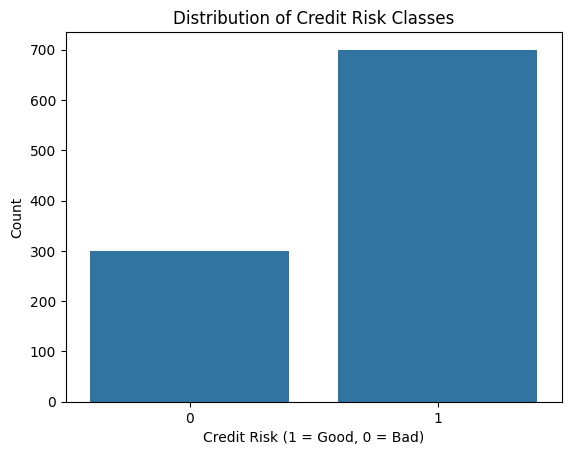

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='credit_risk', data=df)
plt.title("Distribution of Credit Risk Classes")
plt.xlabel("Credit Risk (1 = Good, 0 = Bad)")
plt.ylabel("Count")
plt.show()


Correlation Heatmap

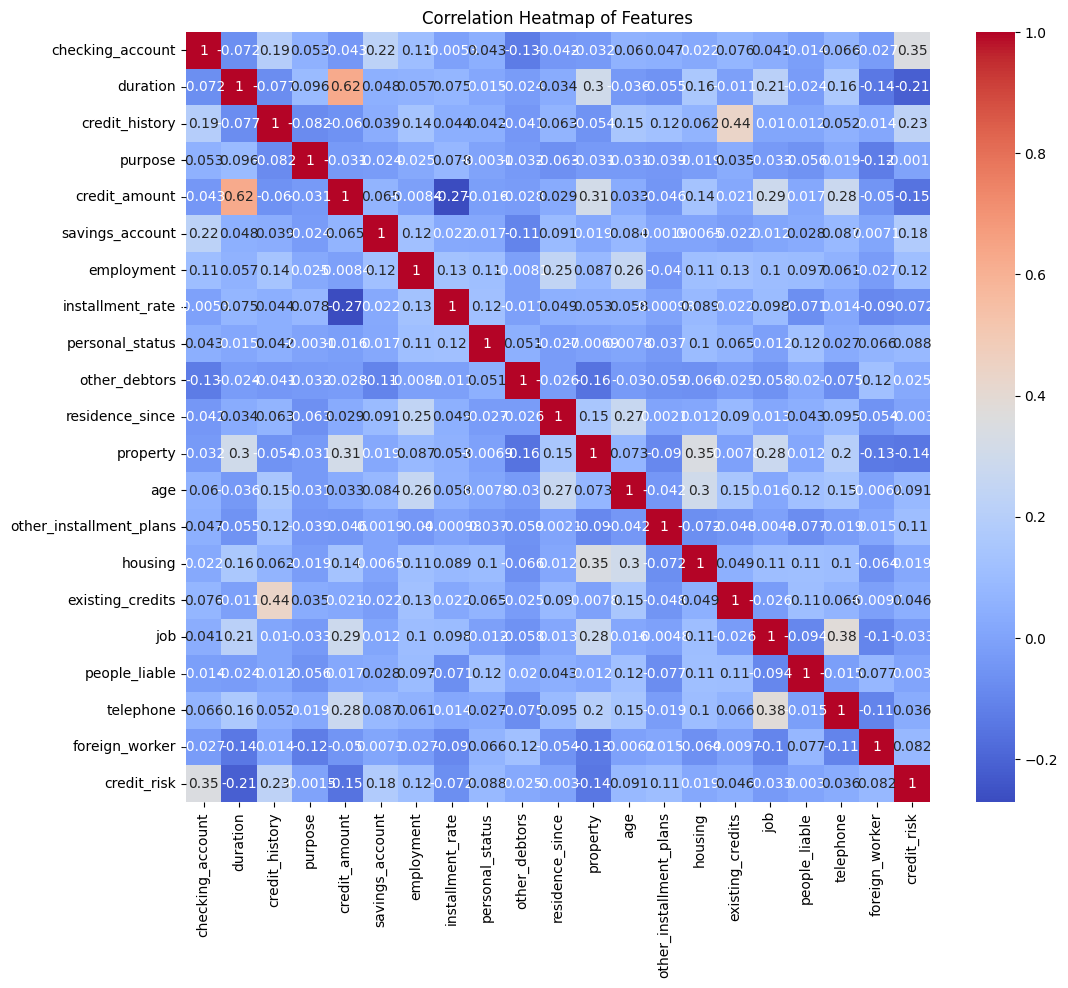

In [ ]:
import numpy as np

plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


Confusion Matrix for Best Model

```
# This is formatted as code
```



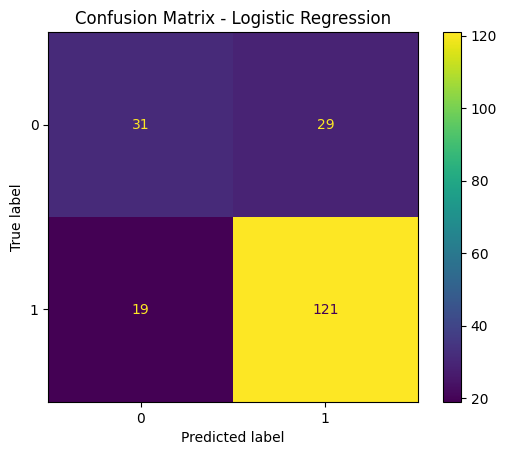

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

best_model = LogisticRegression(max_iter=3000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Feature Importance

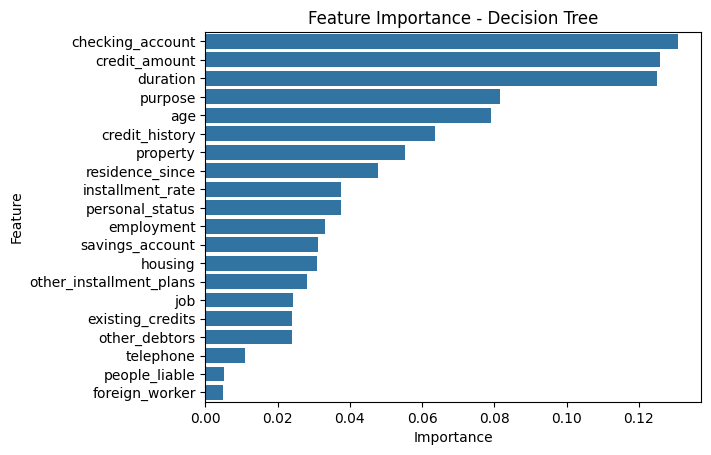

In [ ]:
import pandas as pd

tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)

importances = tree_model.feature_importances_
feat_names = X.columns

feat_imp_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
feat_imp_df.sort_values(by="Importance", ascending=False, inplace=True)

sns.barplot(data=feat_imp_df, x="Importance", y="Feature")
plt.title("Feature Importance - Decision Tree")
plt.show()


Model Comparison Bar Plot

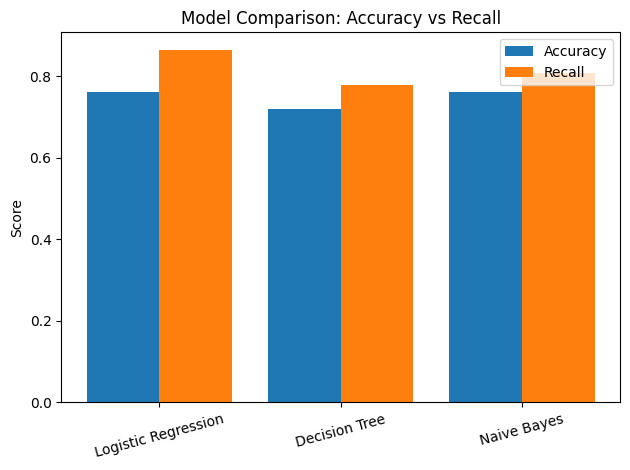

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes']
accuracy = [0.76, 0.72, 0.76]
recall = [0.864, 0.779, 0.807]

x = range(len(models))
plt.bar(x, accuracy, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], recall, width=0.4, label='Recall', align='center')
plt.xticks([i + 0.2 for i in x], models, rotation=15)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy vs Recall")
plt.legend()
plt.tight_layout()
plt.show()
